### Imports

In [16]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, VarianceThreshold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, make_scorer,mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, precision_score, recall_score, f1_score,r2_score
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')


### Make Dataframe

In [17]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
#check missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

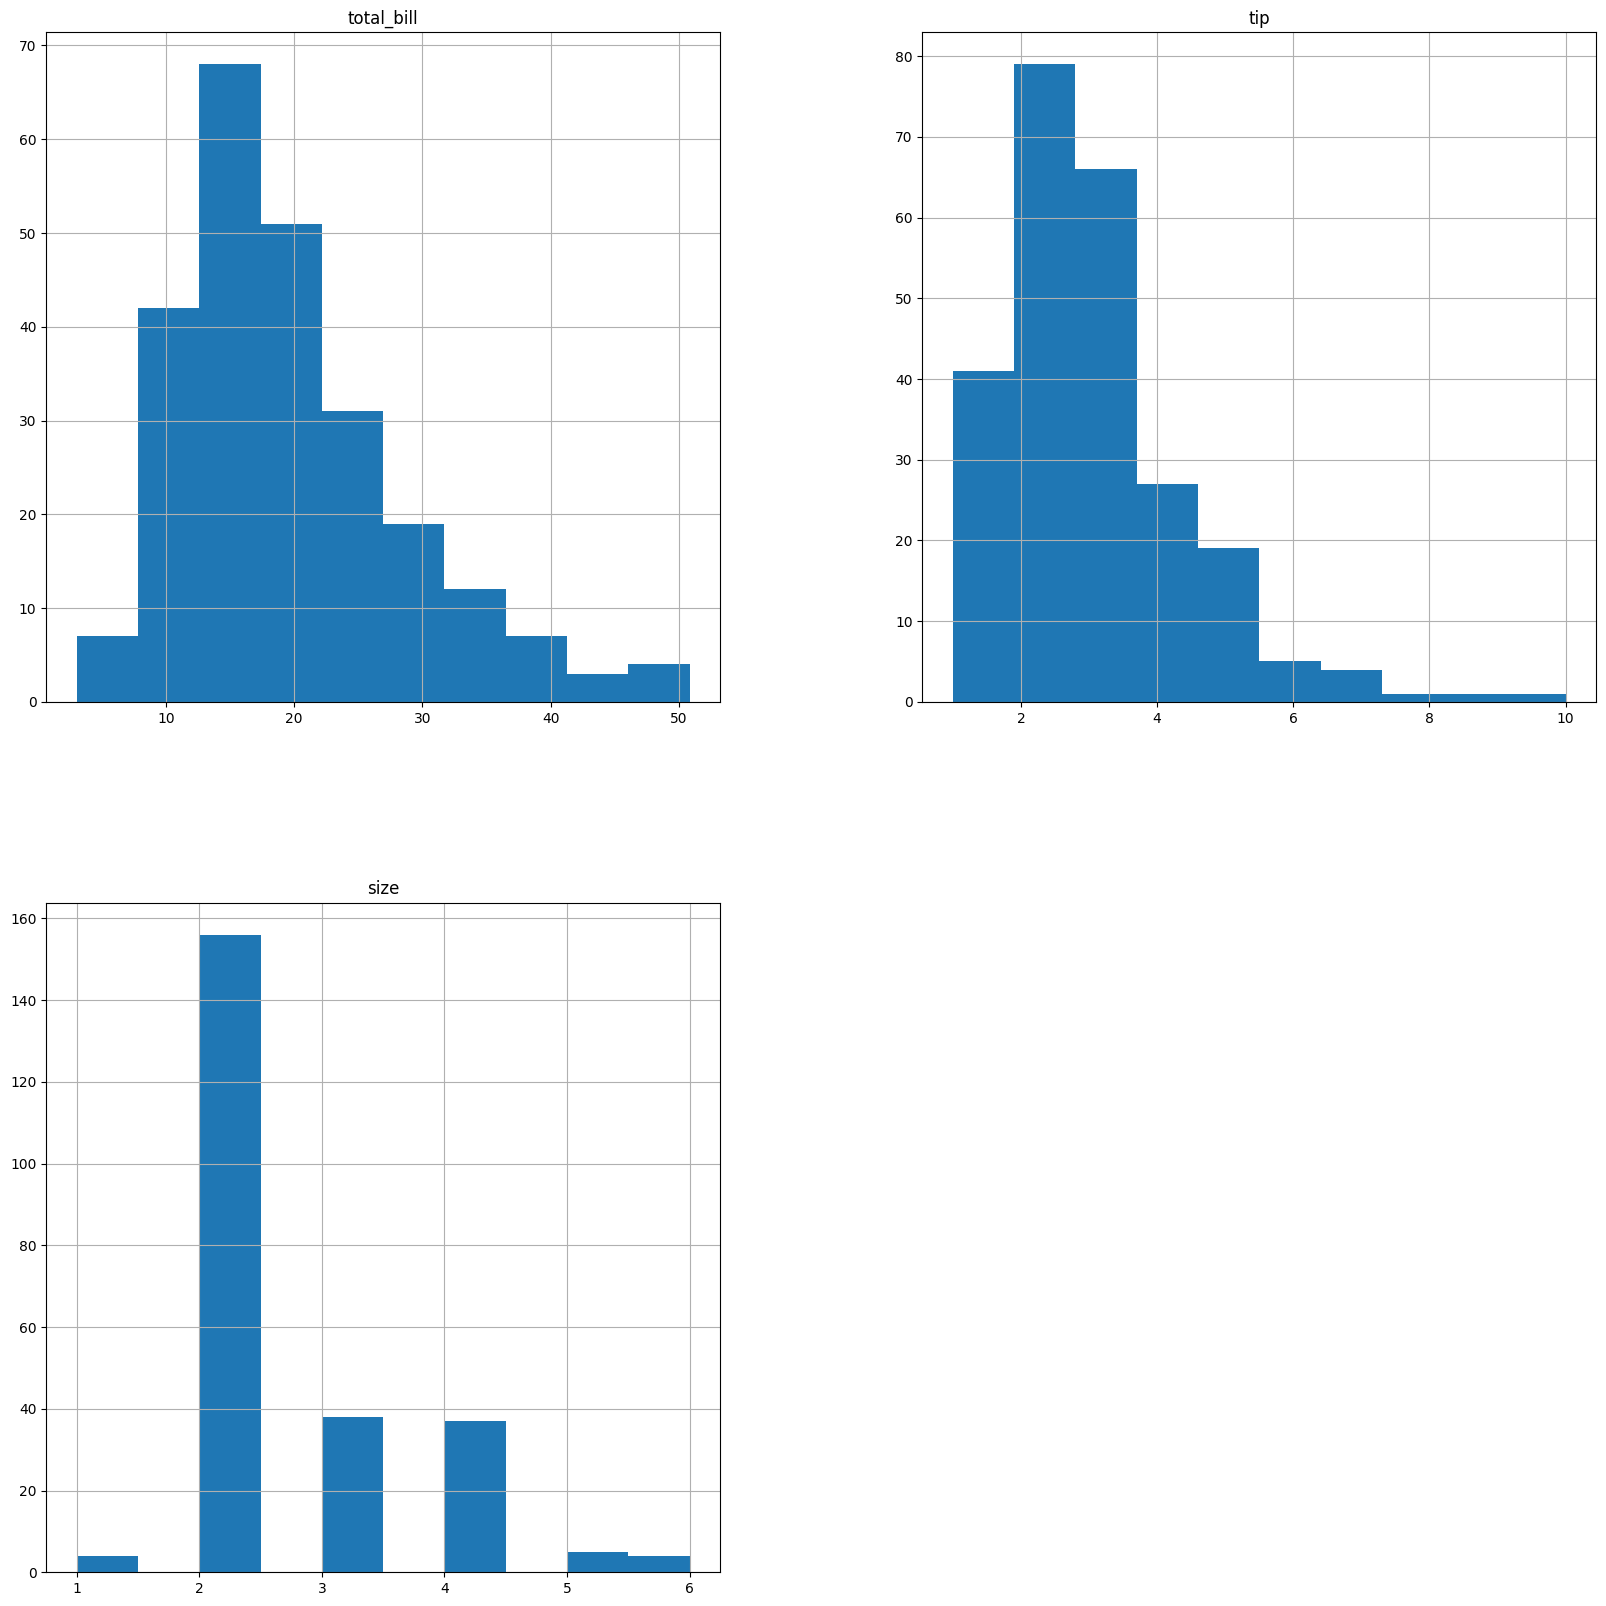

In [19]:
#visualize the data 
df.hist(figsize=(20,20))
plt.show()


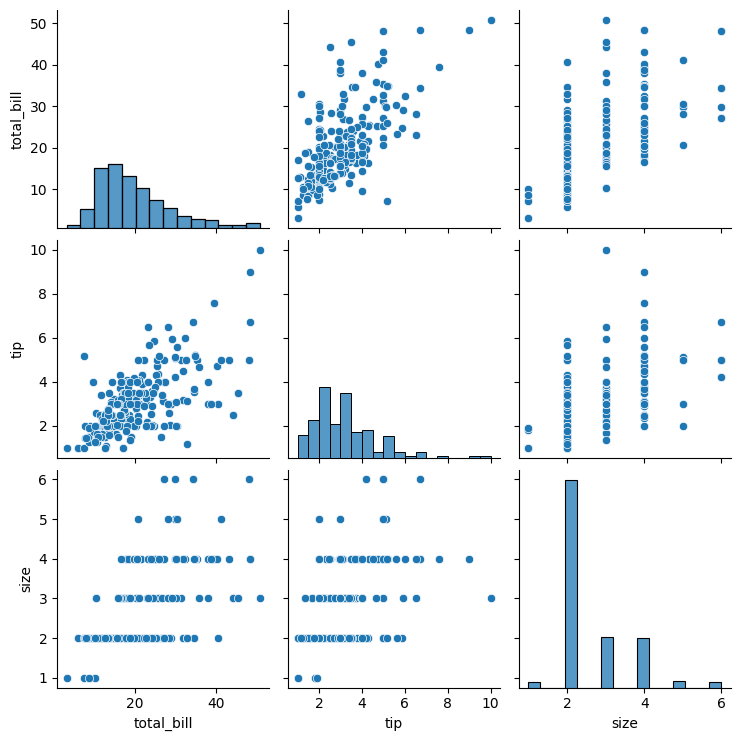

In [20]:
import seaborn as sns
sns.pairplot(df)

### Data Preprocessing

In [21]:
# One-hot encode the categorical variables
categorical_columns = ['sex', 'smoker', 'day', 'time']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])

In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#Apply Label Encoding to the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
#apply one hot encoding to categorical columns
df = pd.get_dummies(df)
df.head()

### Scalers

In [23]:
# Normalize the numerical features
scaler = StandardScaler()
numerical_columns = ['total_bill', 'size']
scaled_numerical = scaler.fit_transform(df[numerical_columns])

In [ ]:
# Apply PCA
pca = PCA(n_components=0.95)
X = pca.fit_transform(X)
X_test = pca.transform(X_test)


In [ ]:
# Variance based Filter
variance_selector = VarianceThreshold(threshold=0.005)
X = variance_selector.fit_transform(X)
X_test = variance_selector.transform(X_test)


In [24]:
# Combine the preprocessed features
X = np.hstack((scaled_numerical, encoded_categorical))
y = df['tip'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models

In [25]:
# Initialize models
#can run all in one go or one by one
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

In [ ]:
#apply regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.2, min_samples_split=4, min_samples_leaf=3, max_features='sqrt')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
model = SVR()#kernel='linear', C=100, gamma=0.1, epsilon=.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Results

In [26]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}


results

{'Linear Regression': {'MSE': 0.703356601743611, 'R2': 0.4373018194348245},
 'Decision Tree Regressor': {'MSE': 1.2551938775510205,
  'R2': -0.004178121600921791},
 'Random Forest Regressor': {'MSE': 0.919451825714287,
  'R2': 0.2644216771916328},
 'Support Vector Regressor': {'MSE': 0.711287724214384,
  'R2': 0.4309567760058153},
 'Gradient Boosting Regressor': {'MSE': 0.7897984677089019,
  'R2': 0.3681467413666747}}

In [27]:
# #calculate the mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ", mse)

# #calculate R2 score
# r2 = model.score(X_test, y_test)
# print("R2 Score: ", r2)

# #calculate RMSE
# rmse = np.sqrt(mse)
# print("Root Mean Squared Error: ", rmse)

#compare the values with the actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

    Actual  Predicted
0     3.18   2.915463
1     2.00   2.411604
2     2.00   3.821130
3     5.16   3.721013
4     2.00   1.983647
5     2.00   3.460936
6     2.56   4.048794
7     2.52   1.827350
8     3.23   2.379348
9     3.00   2.462530
10    3.00   3.160042
11    1.47   1.754162
12    1.50   1.759697
13    2.00   2.499011
14    1.83   1.457031
15    1.36   2.871427
16    4.00   3.201072
17    3.92   3.433706
18    2.47   2.804130
19    5.00   5.822279
20    2.45   3.801324
21    3.35   3.520763
22    4.00   2.462530
23    1.45   1.545273
24    3.50   3.457231
25    2.31   2.229969
26    1.71   2.151729
27    5.00   3.602012
28    2.00   2.874373
29    5.00   7.321419
30    4.00   5.065528
31    1.44   1.974284
32    2.34   2.714068
33    3.21   3.245108
34    3.50   2.804668
35    2.92   4.061999
36    1.50   1.996148
37    5.00   3.428159
38    2.75   1.892819
39    2.00   3.012716
40    1.25   1.754162
41    2.00   2.239810
42    2.55   3.511420
43    1.67   2.257816
44    2.00

### Visualizing results

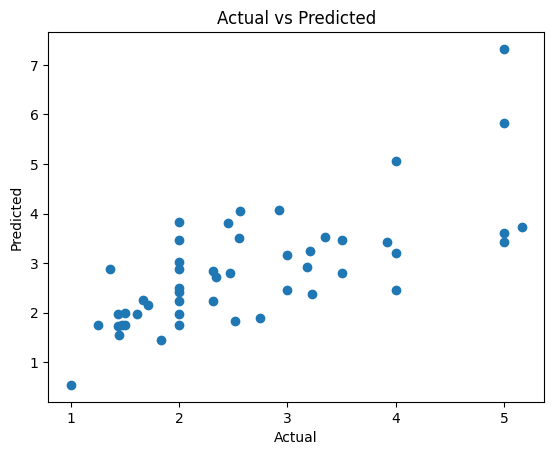

In [28]:
#plot the comparison
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
#output price and predicted price in a csv
comparison.to_csv('Tips_Prediciton.csv', index=False)